In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

athletes_df = pd.read_csv('data_files/athlete_events.csv')
regions_df = pd.read_csv('data_files/noc_regions.csv')
data = pd.merge(athletes_df, regions_df, how='left', on='NOC')
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [6]:
# Cleaning up DataFrame
data.drop(['Team', 'NOC', 'Games', 'City', 'Event', 'notes'], axis=1, inplace=True)
data.rename(columns = {'region':'Country'}, inplace = True)

data['Medal'].fillna('None', inplace = True)
data['Height'].fillna('N/A', inplace = True)
data['Weight'].fillna('N/A', inplace = True)
# data['BMI'] = data['Weight'] / (data['Height'] * data['Height'])
data = data.drop_duplicates()
data.head()

,ID,Name,Sex,Age,Height,Weight,Year,Season,Sport,Medal,Country
0,1,A Dijiang,M,24.0,180,80,1992,Summer,Basketball,None,China
1,2,A Lamusi,M,23.0,170,60,2012,Summer,Judo,None,China
2,3,Gunnar Nielsen Aaby,M,24.0,N/A,N/A,1920,Summer,Football,None,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,N/A,N/A,1900,Summer,Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185,82,1988,Winter,Speed Skating,None,Netherlands


In [9]:
summerGames_df = data[data['Season']=='Summer']
winterGames_df = data[data['Season']== 'Winter']
summerGames_df.head()   

,ID,Name,Sex,Age,Height,Weight,Year,Season,Sport,Medal,Country
0,1,A Dijiang,M,24.0,180,80,1992,Summer,Basketball,None,China
1,2,A Lamusi,M,23.0,170,60,2012,Summer,Judo,None,China
2,3,Gunnar Nielsen Aaby,M,24.0,N/A,N/A,1920,Summer,Football,None,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,N/A,N/A,1900,Summer,Tug-Of-War,Gold,Denmark
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168,N/A,1932,Summer,Athletics,None,Netherlands


In [11]:
summerGames_df.describe()

,ID,Age,Year
count,168009.000000,161228.000000,168009.000000
mean,67793.055955,25.924722,1978.274247
std,39193.378553,6.345135,30.769730
min,1.000000,10.000000,1896.000000
25%,33656.000000,22.000000,1960.000000
50%,68073.000000,25.000000,1988.000000
75%,101683.000000,29.000000,2004.000000
max,135568.000000,97.000000,2016.000000


In [12]:
winterGames_df.describe()

,ID,Age,Year
count,31152.000000,30937.000000,31152.000000
mean,69548.031844,25.171316,1986.459425
std,38408.526385,4.930943,23.160558
min,5.000000,11.000000,1924.000000
25%,37519.000000,22.000000,1972.000000
50%,68273.000000,25.000000,1992.000000
75%,103246.000000,28.000000,2006.000000
max,135571.000000,58.000000,2014.000000


Text(0.5, 1.0, 'Countries at the Summer Olympics')

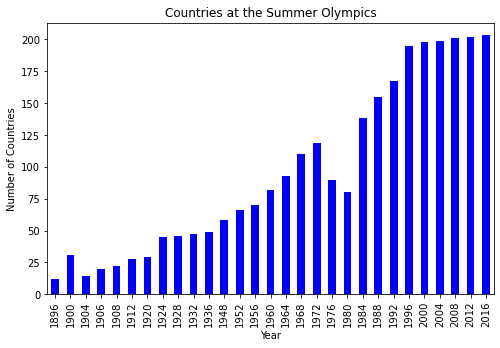

In [22]:
# Number of countries participated the Olympics (Many countries boycotted the 1980 olympics)
plt.figure(figsize=(8,5))
summerGames_df.groupby('Year')['Country'].nunique().plot(kind='bar',color='blue')
plt.xticks(rotation = 90)
plt.ylabel("Number of Countries")
plt.title("Countries at the Summer Olympics")

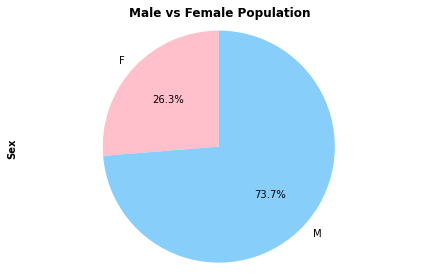

In [14]:
# Generate a pie plot showing the population of female versus male
sex = data.groupby("Sex")["Sex"].count()
colors = ["pink", "lightskyblue"]
sex_data = sex.plot(kind="pie", colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis("equal")
sex_data.set_title(label= "Male vs Female Population", fontweight = "bold")
sex_data.set_ylabel("Sex", fontweight = "bold")
plt.tight_layout()
# sex_data.figure.savefig("Images/piecharts_pandas.png")
plt.show()
plt.close()

In [ ]:
# (May be) Generate a pie plot showing above in early days vs recent years

Text(0.5, 1.0, 'Athletes at the Olympic Games')

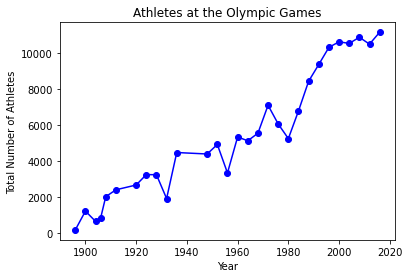

In [18]:
plt.figure
summerGames_df.groupby('Year')['ID'].nunique().plot(color='blue',marker='o')
plt.ylabel("Total Number of Athletes")
plt.title("Athletes at the Olympic Games")

Text(0.5, 1.0, 'Athletes at the Olympic Games by Sex')

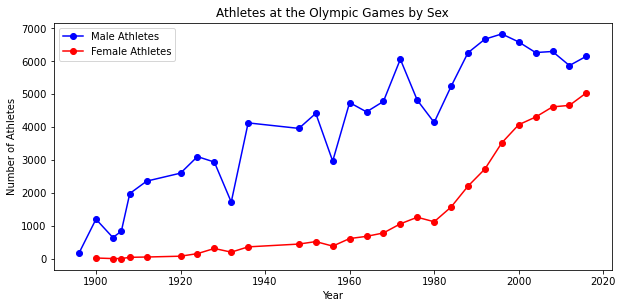

In [15]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,2)
summerGames_df.loc[summerGames_df['Sex']=='M'].groupby('Year')['ID'].nunique().plot(color='b',marker='o',label='Male Athletes')
summerGames_df.loc[summerGames_df['Sex']=='F'].groupby('Year')['ID'].nunique().plot(color='r',marker='o',label='Female Athletes')
plt.ylabel("Number of Athletes")
plt.legend(loc='upper left')
plt.title("Athletes at the Olympic Games by Sex")